# 세계은행 GDP 데이터로 이란이랑 상관관계가 있는 국가 뽑아보기


-> 이란의 GDP 성장률과 양의 상관관계 혹은 음의 상관관계가 강한 변수를 추출하여 예측모델의 독립변수로 활용하기 위한 과정

In [1]:
import numpy as np
import pandas as pd

In [2]:
world_gdp = pd.read_csv(r"C:\Users\LG\Desktop\Paper\Paper_Code\DATA\API_WORLDBANK_GDP.csv", encoding = 'utf-8')
world_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,727,849,721","2,790,849,721","2,962,907,263","2,983,635,196","3,092,429,050","3,276,184,358","3,395,798,883","2,558,906,304","3,103,184,102","3,544,707,788"
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"18,478,095,142","19,366,314,294","20,506,467,178","22,242,734,491","24,294,329,780","26,619,560,807",...,"986,343,000,000","1,006,990,000,000","932,513,000,000","890,051,000,000","1,028,390,000,000","1,012,520,000,000","1,006,190,000,000","928,880,000,000","1,086,530,000,000","1,185,140,000,000"
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,"537,777,811","548,888,896","546,666,678","751,111,191","800,000,044","1,006,666,638",...,"20,146,416,876","20,497,128,600","19,134,221,745","18,116,572,399","18,753,456,507","18,053,222,735","18,799,444,415","19,955,929,061","14,266,499,430",NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"10,411,646,287","11,135,924,728","11,951,712,282","12,685,805,890","13,848,998,669","14,874,755,834",...,"834,097,000,000","894,505,000,000","769,263,000,000","692,115,000,000","685,630,000,000","768,158,000,000","823,406,000,000","786,962,000,000","844,928,000,000","875,394,000,000"
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"132,339,000,000","135,967,000,000","90,496,420,626","52,761,617,226","73,690,155,047","79,450,688,232","70,897,962,713","48,501,561,230","66,505,129,989","106,783,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"6,735,328,610","7,074,394,735","6,295,848,423","6,682,677,290","7,180,764,703","7,878,759,715","7,899,737,577","7,717,145,218","9,412,034,299","9,409,473,518"
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"40,415,233,436","43,228,585,321","42,444,489,461","31,317,824,906","26,842,228,805","21,606,160,777",NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,"8,748,596,501","9,225,996,310","9,813,996,074","10,854,195,658","11,955,995,218","13,068,994,772",...,"400,886,000,000","381,199,000,000","346,710,000,000","323,586,000,000","381,449,000,000","405,261,000,000","389,330,000,000","338,291,000,000","420,118,000,000","405,271,000,000"
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,"713,000,000","696,285,714","693,142,857","718,714,286","839,428,571","1,082,857,143",...,"28,037,239,463","27,141,023,558","21,251,216,799","20,958,412,538","25,873,601,261","26,311,507,274","23,308,667,781","18,110,638,269","22,096,416,934","29,163,782,138"


In [3]:
world_gdp.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [4]:
world_gdp["Country Name"].unique

<bound method Series.unique of 0                            Aruba
1      Africa Eastern and Southern
2                      Afghanistan
3       Africa Western and Central
4                           Angola
                  ...             
261                         Kosovo
262                    Yemen, Rep.
263                   South Africa
264                         Zambia
265                       Zimbabwe
Name: Country Name, Length: 266, dtype: object>

In [5]:
world_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country Name    266 non-null    object
 1   Country Code    266 non-null    object
 2   Indicator Name  266 non-null    object
 3   Indicator Code  266 non-null    object
 4   1960            126 non-null    object
 5   1961            127 non-null    object
 6   1962            128 non-null    object
 7   1963            128 non-null    object
 8   1964            128 non-null    object
 9   1965            140 non-null    object
 10  1966            143 non-null    object
 11  1967            146 non-null    object
 12  1968            151 non-null    object
 13  1969            151 non-null    object
 14  1970            160 non-null    object
 15  1971            163 non-null    object
 16  1972            163 non-null    object
 17  1973            163 non-null    object
 18  1974      

In [6]:
# Country Name이 "Iran", "Korea", "United States"인 행만 추출하여 새로운 DataFrame 만들기
# 혹시 관련이 있을까?
countries = world_gdp[world_gdp['Country Name'].isin(["Iran, Islamic Rep.", "Korea, Rep.", "United States"])]
countries


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
112,"Iran, Islamic Rep.",IRN,GDP (current US$),NY.GDP.MKTP.CD,"4,199,134,390","4,426,949,095","4,693,566,416","4,928,628,018","5,379,845,648","6,197,319,929",...,"492,776,000,000","460,383,000,000","408,213,000,000","457,955,000,000","486,630,000,000","329,692,000,000","283,650,000,000","239,735,000,000","359,097,000,000","413,493,000,000"
126,"Korea, Rep.",KOR,GDP (current US$),NY.GDP.MKTP.CD,"3,958,811,881","2,417,628,737","2,814,615,385","3,988,461,538","3,459,019,943","3,120,861,499",...,"1,370,630,000,000","1,484,490,000,000","1,466,040,000,000","1,499,680,000,000","1,623,070,000,000","1,725,370,000,000","1,651,420,000,000","1,644,310,000,000","1,818,430,000,000","1,673,920,000,000"
251,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,"543,300,000,000","563,300,000,000","605,100,000,000","638,600,000,000","685,800,000,000","743,700,000,000",...,"16,843,200,000,000","17,550,700,000,000","18,206,000,000,000","18,695,100,000,000","19,477,300,000,000","20,533,100,000,000","21,381,000,000,000","21,060,500,000,000","23,315,100,000,000","25,439,700,000,000"


In [7]:
missing_values = countries.isna().any()

# 결측치 어디있나 확인
print("결측치 확인:")
print(missing_values[missing_values].index.tolist())

결측치 확인:
['1991', '1992']


In [8]:
countries.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [9]:
# '1991', '1992'을 포함한 이전 년도 데이터 열 모두 삭제
countries_drop = countries.drop(['Country Code', 'Indicator Name', 'Indicator Code',
    '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
    '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
    '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
    '1987', '1988', '1989', '1990', '1991', '1992'], axis=1)

countries_drop = countries_drop.reset_index(drop=True)
countries_drop

,Country Name,1993,1994,1995,1996,1997,1998,1999,2000,2001,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Iran, Islamic Rep.","63,743,623,231","71,841,461,172","96,419,225,745","120,404,000,000","113,919,000,000","110,277,000,000","113,848,000,000","109,592,000,000","126,879,000,000",...,"492,776,000,000","460,383,000,000","408,213,000,000","457,955,000,000","486,630,000,000","329,692,000,000","283,650,000,000","239,735,000,000","359,097,000,000","413,493,000,000"
1,"Korea, Rep.","392,666,000,000","463,620,000,000","566,581,000,000","610,167,000,000","569,755,000,000","383,332,000,000","497,514,000,000","576,179,000,000","547,656,000,000",...,"1,370,630,000,000","1,484,490,000,000","1,466,040,000,000","1,499,680,000,000","1,623,070,000,000","1,725,370,000,000","1,651,420,000,000","1,644,310,000,000","1,818,430,000,000","1,673,920,000,000"
2,United States,"6,858,560,000,000","7,287,240,000,000","7,639,750,000,000","8,073,120,000,000","8,577,550,000,000","9,062,820,000,000","9,631,170,000,000","10,250,900,000,000","10,581,900,000,000",...,"16,843,200,000,000","17,550,700,000,000","18,206,000,000,000","18,695,100,000,000","19,477,300,000,000","20,533,100,000,000","21,381,000,000,000","21,060,500,000,000","23,315,100,000,000","25,439,700,000,000"


In [10]:
# 'Country Name' 열을 인덱스로 설정
countries_drop.set_index('Country Name', inplace=True)

# 자료형 숫자로 바꾸기
for column in countries_drop.columns:
    countries_drop[column] = countries_drop[column].str.replace(',', '').astype(float)

countries_drop

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
"Iran, Islamic Rep.",6.374362e+10,7.184146e+10,9.641923e+10,1.204040e+11,1.139190e+11,1.102770e+11,1.138480e+11,1.095920e+11,1.268790e+11,1.286270e+11,...,4.927760e+11,4.603830e+11,4.082130e+11,4.579550e+11,4.866300e+11,3.296920e+11,2.836500e+11,2.397350e+11,3.590970e+11,4.134930e+11
"Korea, Rep.",3.926660e+11,4.636200e+11,5.665810e+11,6.101670e+11,5.697550e+11,3.833320e+11,4.975140e+11,5.761790e+11,5.476560e+11,6.272470e+11,...,1.370630e+12,1.484490e+12,1.466040e+12,1.499680e+12,1.623070e+12,1.725370e+12,1.651420e+12,1.644310e+12,1.818430e+12,1.673920e+12
United States,6.858560e+12,7.287240e+12,7.639750e+12,8.073120e+12,8.577550e+12,9.062820e+12,9.631170e+12,1.025090e+13,1.058190e+13,1.092910e+13,...,1.684320e+13,1.755070e+13,1.820600e+13,1.869510e+13,1.947730e+13,2.053310e+13,2.138100e+13,2.106050e+13,2.331510e+13,2.543970e+13


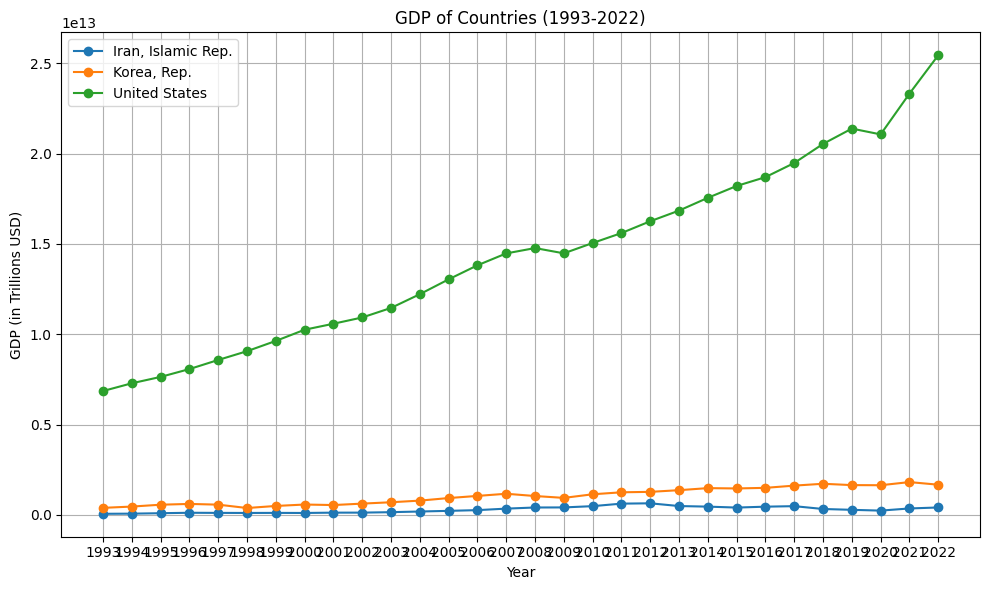

In [11]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.figure(figsize=(10, 6))

# 각 나라별 GDP 그래프 그리기
for country in countries_drop.index:
    plt.plot(countries_drop.columns, countries_drop.loc[country], marker='o', label=country)

# 그래프 제목 및 축 레이블 설정
plt.title('GDP of Countries (1993-2022)')
plt.xlabel('Year')
plt.ylabel('GDP (in Trillions USD)')

# 범례 표시
plt.legend()

# 그래프 표시
plt.grid(True)
plt.tight_layout()
plt.show()


In [12]:
# 각 나라별로 연도별 GDP의 평균, 표준 편차, 최소값, 최대값 등을 계산
summary_statistics = countries_drop.describe()
summary_statistics

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
count,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,...,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00
mean,2.438323e+12,2.607567e+12,2.767583e+12,2.934564e+12,3.087075e+12,3.185476e+12,3.414177e+12,3.645557e+12,3.752145e+12,3.894991e+12,...,6.235535e+12,6.498524e+12,6.693418e+12,6.884245e+12,7.195667e+12,7.529387e+12,7.772023e+12,7.648182e+12,8.497542e+12,9.175704e+12
std,3.831569e+12,4.057447e+12,4.225964e+12,4.456853e+12,4.760350e+12,5.091760e+12,5.387490e+12,5.725150e+12,5.918482e+12,6.096816e+12,...,9.196987e+12,9.585152e+12,9.984208e+12,1.024175e+13,1.065137e+13,1.128315e+13,1.180554e+13,1.163662e+13,1.285311e+13,1.409913e+13
min,6.374362e+10,7.184146e+10,9.641923e+10,1.204040e+11,1.139190e+11,1.102770e+11,1.138480e+11,1.095920e+11,1.268790e+11,1.286270e+11,...,4.927760e+11,4.603830e+11,4.082130e+11,4.579550e+11,4.866300e+11,3.296920e+11,2.836500e+11,2.397350e+11,3.590970e+11,4.134930e+11
25%,2.282048e+11,2.677307e+11,3.315001e+11,3.652855e+11,3.418370e+11,2.468045e+11,3.056810e+11,3.428855e+11,3.372675e+11,3.779370e+11,...,9.317030e+11,9.724365e+11,9.371265e+11,9.788175e+11,1.054850e+12,1.027531e+12,9.675350e+11,9.420225e+11,1.088764e+12,1.043706e+12
50%,3.926660e+11,4.636200e+11,5.665810e+11,6.101670e+11,5.697550e+11,3.833320e+11,4.975140e+11,5.761790e+11,5.476560e+11,6.272470e+11,...,1.370630e+12,1.484490e+12,1.466040e+12,1.499680e+12,1.623070e+12,1.725370e+12,1.651420e+12,1.644310e+12,1.818430e+12,1.673920e+12
75%,3.625613e+12,3.875430e+12,4.103166e+12,4.341644e+12,4.573652e+12,4.723076e+12,5.064342e+12,5.413540e+12,5.564778e+12,5.778174e+12,...,9.106915e+12,9.517595e+12,9.836020e+12,1.009739e+13,1.055018e+13,1.112924e+13,1.151621e+13,1.135240e+13,1.256676e+13,1.355681e+13
max,6.858560e+12,7.287240e+12,7.639750e+12,8.073120e+12,8.577550e+12,9.062820e+12,9.631170e+12,1.025090e+13,1.058190e+13,1.092910e+13,...,1.684320e+13,1.755070e+13,1.820600e+13,1.869510e+13,1.947730e+13,2.053310e+13,2.138100e+13,2.106050e+13,2.331510e+13,2.543970e+13


In [13]:
!pip install seaborn

In [14]:
import seaborn as sns

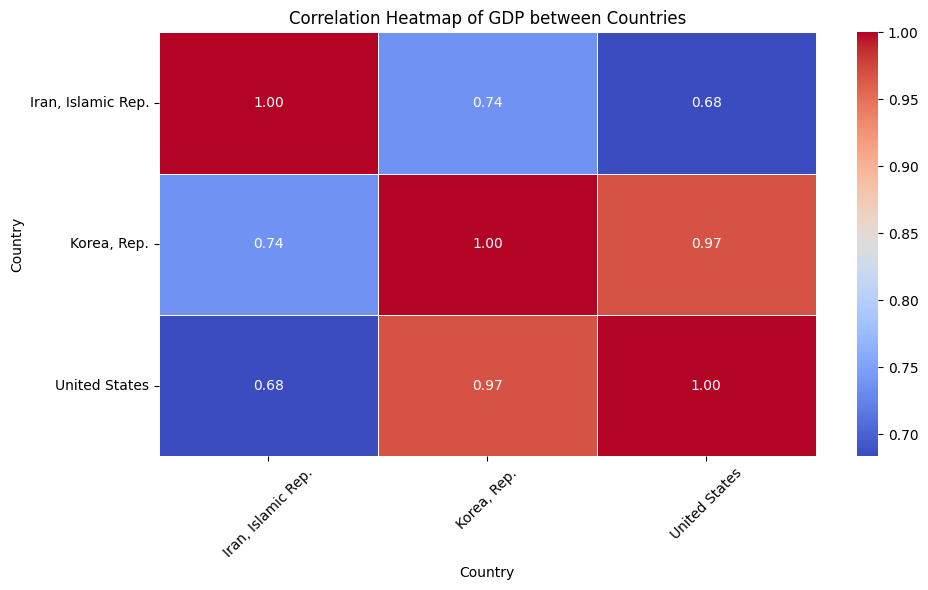

In [15]:
# 데이터 전치
df_transposed = countries_drop.transpose()

# 상관관계 계산
correlation_matrix = df_transposed.corr()

# 히트맵 그래프로 상관관계 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of GDP between Countries')
plt.xlabel('Country')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

결론: 우리나라와 미국과의 GDP 변화의 상관관계는 매우 높지만, 이란과 미국은 soso -> 한국과 미국 GDP 모두 변수 후보에서 탈락

# 그래? 그럼 세계 모든 국가의 GDP와 이란 GDP간의 상관관계는?

In [16]:
world_gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,727,849,721","2,790,849,721","2,962,907,263","2,983,635,196","3,092,429,050","3,276,184,358","3,395,798,883","2,558,906,304","3,103,184,102","3,544,707,788"
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"18,478,095,142","19,366,314,294","20,506,467,178","22,242,734,491","24,294,329,780","26,619,560,807",...,"986,343,000,000","1,006,990,000,000","932,513,000,000","890,051,000,000","1,028,390,000,000","1,012,520,000,000","1,006,190,000,000","928,880,000,000","1,086,530,000,000","1,185,140,000,000"
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,"537,777,811","548,888,896","546,666,678","751,111,191","800,000,044","1,006,666,638",...,"20,146,416,876","20,497,128,600","19,134,221,745","18,116,572,399","18,753,456,507","18,053,222,735","18,799,444,415","19,955,929,061","14,266,499,430",NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"10,411,646,287","11,135,924,728","11,951,712,282","12,685,805,890","13,848,998,669","14,874,755,834",...,"834,097,000,000","894,505,000,000","769,263,000,000","692,115,000,000","685,630,000,000","768,158,000,000","823,406,000,000","786,962,000,000","844,928,000,000","875,394,000,000"
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"132,339,000,000","135,967,000,000","90,496,420,626","52,761,617,226","73,690,155,047","79,450,688,232","70,897,962,713","48,501,561,230","66,505,129,989","106,783,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"6,735,328,610","7,074,394,735","6,295,848,423","6,682,677,290","7,180,764,703","7,878,759,715","7,899,737,577","7,717,145,218","9,412,034,299","9,409,473,518"
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"40,415,233,436","43,228,585,321","42,444,489,461","31,317,824,906","26,842,228,805","21,606,160,777",NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,"8,748,596,501","9,225,996,310","9,813,996,074","10,854,195,658","11,955,995,218","13,068,994,772",...,"400,886,000,000","381,199,000,000","346,710,000,000","323,586,000,000","381,449,000,000","405,261,000,000","389,330,000,000","338,291,000,000","420,118,000,000","405,271,000,000"
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,"713,000,000","696,285,714","693,142,857","718,714,286","839,428,571","1,082,857,143",...,"28,037,239,463","27,141,023,558","21,251,216,799","20,958,412,538","25,873,601,261","26,311,507,274","23,308,667,781","18,110,638,269","22,096,416,934","29,163,782,138"


In [17]:
world_gdp_drop = world_gdp.drop(['Country Code', 'Indicator Name', 'Indicator Code',
    '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
    '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
    '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
    '1987', '1988', '1989', '1990', '1991', '1992'], axis=1)

# 'Country Name' 열을 인덱스로 설정
world_gdp_drop.set_index('Country Name', inplace=True)


In [18]:
world_gdp_drop

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,"1,083,240,223","1,245,810,056","1,320,670,391","1,379,888,268","1,531,843,575","1,665,363,128","1,722,905,028","1,873,452,514","1,896,456,983","1,961,843,575",...,"2,727,849,721","2,790,849,721","2,962,907,263","2,983,635,196","3,092,429,050","3,276,184,358","3,395,798,883","2,558,906,304","3,103,184,102","3,544,707,788"
Africa Eastern and Southern,"238,353,000,000","241,158,000,000","270,814,000,000","268,993,000,000","284,065,000,000","267,287,000,000","263,674,000,000","285,404,000,000","260,219,000,000","267,142,000,000",...,"986,343,000,000","1,006,990,000,000","932,513,000,000","890,051,000,000","1,028,390,000,000","1,012,520,000,000","1,006,190,000,000","928,880,000,000","1,086,530,000,000","1,185,140,000,000"
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"3,825,701,406",...,"20,146,416,876","20,497,128,600","19,134,221,745","18,116,572,399","18,753,456,507","18,053,222,735","18,799,444,415","19,955,929,061","14,266,499,430",NaN
Africa Western and Central,"127,981,000,000","133,143,000,000","205,687,000,000","261,262,000,000","274,377,000,000","294,950,000,000","137,292,000,000","140,133,000,000","147,525,000,000","176,589,000,000",...,"834,097,000,000","894,505,000,000","769,263,000,000","692,115,000,000","685,630,000,000","768,158,000,000","823,406,000,000","786,962,000,000","844,928,000,000","875,394,000,000"
Angola,"6,084,688,936","4,438,321,017","5,538,749,260","6,535,434,716","7,675,412,601","6,506,381,417","6,152,922,942","9,129,594,816","8,936,079,251","15,285,592,486",...,"132,339,000,000","135,967,000,000","90,496,420,626","52,761,617,226","73,690,155,047","79,450,688,232","70,897,962,713","48,501,561,230","66,505,129,989","106,783,000,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"6,735,328,610","7,074,394,735","6,295,848,423","6,682,677,290","7,180,764,703","7,878,759,715","7,899,737,577","7,717,145,218","9,412,034,299","9,409,473,518"
"Yemen, Rep.","21,736,802,664","28,019,483,764","12,796,345,679","6,496,163,616","6,838,298,531","6,322,175,566","7,639,325,296","9,679,316,770","9,852,990,693","10,693,430,511",...,"40,415,233,436","43,228,585,321","42,444,489,461","31,317,824,906","26,842,228,805","21,606,160,777",NaN,NaN,NaN,NaN
South Africa,"147,195,000,000","153,513,000,000","171,736,000,000","163,235,000,000","168,978,000,000","152,983,000,000","151,517,000,000","151,753,000,000","135,430,000,000","129,088,000,000",...,"400,886,000,000","381,199,000,000","346,710,000,000","323,586,000,000","381,449,000,000","405,261,000,000","389,330,000,000","338,291,000,000","420,118,000,000","405,271,000,000"


In [19]:
# 자료형 숫자로 바꾸기
for column in world_gdp_drop.columns:
    world_gdp_drop[column] = world_gdp_drop[column].str.replace(',', '').astype(float)

world_gdp_drop

,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,1.083240e+09,1.245810e+09,1.320670e+09,1.379888e+09,1.531844e+09,1.665363e+09,1.722905e+09,1.873453e+09,1.896457e+09,1.961844e+09,...,2.727850e+09,2.790850e+09,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09
Africa Eastern and Southern,2.383530e+11,2.411580e+11,2.708140e+11,2.689930e+11,2.840650e+11,2.672870e+11,2.636740e+11,2.854040e+11,2.602190e+11,2.671420e+11,...,9.863430e+11,1.006990e+12,9.325130e+11,8.900510e+11,1.028390e+12,1.012520e+12,1.006190e+12,9.288800e+11,1.086530e+12,1.185140e+12
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.825701e+09,...,2.014642e+10,2.049713e+10,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN
Africa Western and Central,1.279810e+11,1.331430e+11,2.056870e+11,2.612620e+11,2.743770e+11,2.949500e+11,1.372920e+11,1.401330e+11,1.475250e+11,1.765890e+11,...,8.340970e+11,8.945050e+11,7.692630e+11,6.921150e+11,6.856300e+11,7.681580e+11,8.234060e+11,7.869620e+11,8.449280e+11,8.753940e+11
Angola,6.084689e+09,4.438321e+09,5.538749e+09,6.535435e+09,7.675413e+09,6.506381e+09,6.152923e+09,9.129595e+09,8.936079e+09,1.528559e+10,...,1.323390e+11,1.359670e+11,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067830e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735329e+09,7.074395e+09,6.295848e+09,6.682677e+09,7.180765e+09,7.878760e+09,7.899738e+09,7.717145e+09,9.412034e+09,9.409474e+09
"Yemen, Rep.",2.173680e+10,2.801948e+10,1.279635e+10,6.496164e+09,6.838299e+09,6.322176e+09,7.639325e+09,9.679317e+09,9.852991e+09,1.069343e+10,...,4.041523e+10,4.322859e+10,4.244449e+10,3.131782e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,NaN
South Africa,1.471950e+11,1.535130e+11,1.717360e+11,1.632350e+11,1.689780e+11,1.529830e+11,1.515170e+11,1.517530e+11,1.354300e+11,1.290880e+11,...,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.052610e+11,3.893300e+11,3.382910e+11,4.201180e+11,4.052710e+11


In [20]:
# 데이터 전치
df_world_transposed = world_gdp_drop.transpose()

In [21]:
# 상관관계 계산
correlation_matrix = df_world_transposed.corr()

# 상관관계가 0.6 이상이거나 -0.6 이하인 경우만 필터링
filtered_correlation = correlation_matrix[
    (correlation_matrix >= 0.7) | (correlation_matrix <= -0.7)
]

In [22]:
# 중복된 데이터를 제거하기 위해 상삼각행렬로 변환
filtered_correlation = filtered_correlation.where(np.triu(np.ones(filtered_correlation.shape), k=1).astype(np.bool))
filtered_correlation

c:\Users\LG\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,...,Virgin Islands (U.S.),Viet Nam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,0.916996,NaN,0.875805,0.781108,0.946651,0.849102,0.929564,0.942911,0.724463,...,NaN,0.856401,0.915464,0.934176,0.933558,0.725187,NaN,0.864506,0.890028,0.731599
Africa Eastern and Southern,NaN,NaN,0.937806,0.976754,0.889090,0.966239,0.799982,0.993256,0.991254,0.867816,...,NaN,0.921530,0.983058,0.987367,0.980693,0.864126,0.834877,0.960213,0.982842,0.825141
Afghanistan,NaN,NaN,NaN,0.943141,0.753789,0.782482,NaN,0.938781,0.928158,0.929462,...,NaN,0.826343,0.896756,0.884650,0.937868,NaN,0.891917,0.804490,0.934368,0.770562
Africa Western and Central,NaN,NaN,NaN,NaN,0.880801,0.935244,0.737555,0.976119,0.973173,0.869114,...,NaN,0.920346,0.965521,0.970264,0.967134,0.796732,0.837769,0.916679,0.966837,0.841385
Angola,NaN,NaN,NaN,NaN,NaN,0.827148,0.800598,0.902535,0.890545,0.782883,...,NaN,NaN,0.805865,0.829369,0.840694,NaN,0.866707,0.907101,0.932933,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.852485
"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.789555,0.845590,NaN
South Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.944908,0.702019


In [23]:
# 'Iran, Islamic Rep.'와 다른 나라들 간의 상관관계만 선택
iran_correlation = filtered_correlation.loc['Iran, Islamic Rep.', :]

# 결과 출력
print(iran_correlation)


Country Name
Aruba                               NaN
Africa Eastern and Southern         NaN
Afghanistan                         NaN
Africa Western and Central          NaN
Angola                              NaN
                                 ...   
Kosovo                              NaN
Yemen, Rep.                    0.806411
South Africa                   0.907416
Zambia                         0.886710
Zimbabwe                            NaN
Name: Iran, Islamic Rep., Length: 266, dtype: float64


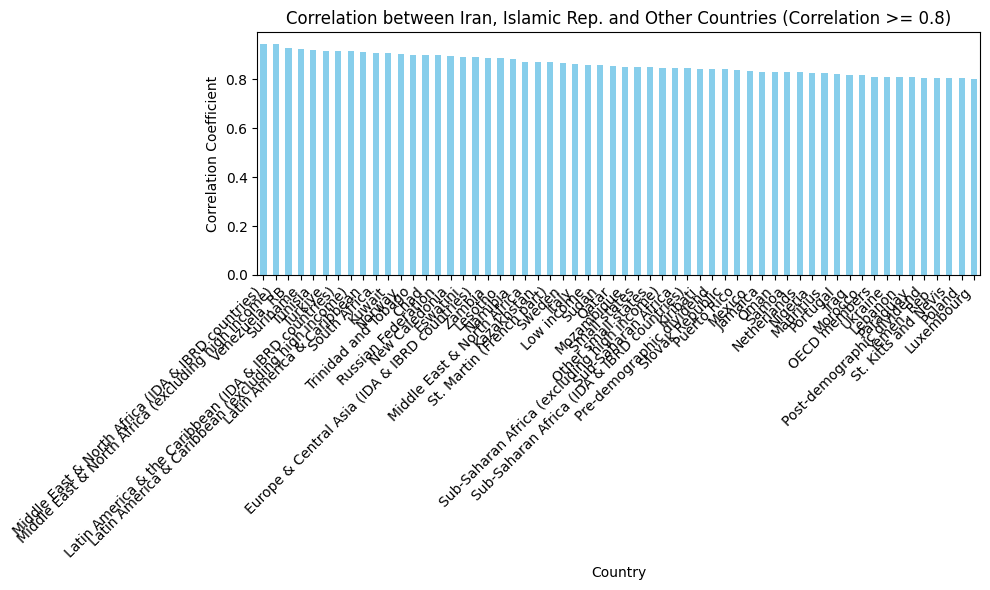

In [28]:
# NaN 값을 제거하여 새로운 Series 생성
iran_correlation_cleaned = iran_correlation.dropna()

# 상관관계가 0.8 이상인 국가들 선택
iran_correlation_cleaned_filtered = iran_correlation_cleaned[iran_correlation_cleaned >= 0.8]

# 상관관계가 높은 순으로 정렬
iran_correlation_cleaned_filtered_sorted = iran_correlation_cleaned_filtered.sort_values(ascending=False)

# 'Iran, Islamic Rep.'와 상관관계가 0.8 이상인 국가들만 시각화
plt.figure(figsize=(10, 6))
iran_correlation_cleaned_filtered_sorted.plot(kind='bar', color='skyblue')
plt.title("Correlation between Iran, Islamic Rep. and Other Countries (Correlation >= 0.8)")
plt.xlabel("Country")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


결론: 낮은 상관관계로 한국과 미국의 수치는 반영할 수 없게 됨. 반영한다면, 상위 3개의 국가 정도? MiddleEast & North Africa 정도?? 아니면 이란 GDP 수치 분석만 사용해야 함.